In [28]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.4)
import warnings
warnings.filterwarnings('ignore')
import time

# Sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold 
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, RandomizedSearchCV, train_test_split


In [29]:
train_df=pd.read_csv('train_BRCpofr.csv')
test_df=pd.read_csv('test_koRSKBP.csv')
sample_submission=pd.read_csv('sample_submission_pred.csv')

In [19]:
train_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


# First Check unique values

In [8]:
train_df['area'].unique()

array(['Urban', 'Rural'], dtype=object)

In [9]:
train_df['qualification'].unique()

array(['Bachelor', 'High School', 'Others'], dtype=object)

In [10]:
train_df['income'].unique()

array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object)

In [11]:
train_df['vintage'].unique()

array([5, 8, 7, 6, 1, 0, 3, 4, 2])

In [12]:
train_df['num_policies'].unique()

array(['More than 1', '1'], dtype=object)

In [13]:
train_df['policy'].unique()

array(['A', 'C', 'B'], dtype=object)

In [32]:
train_df['type_of_policy'].unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

# Check distribution and dependencies

In [35]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

gender count plot 



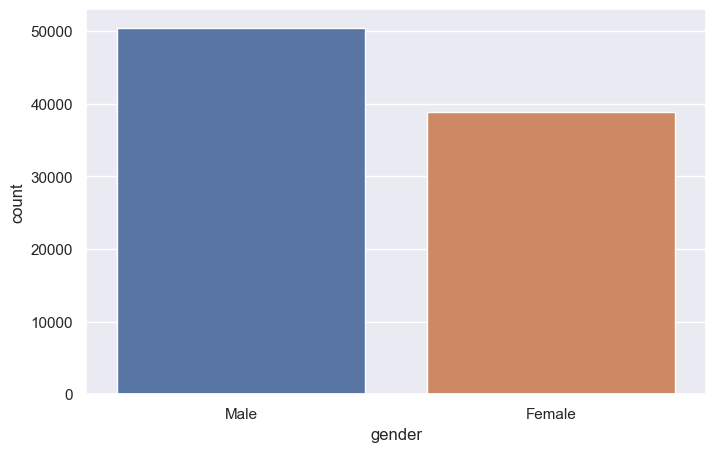

area count plot 



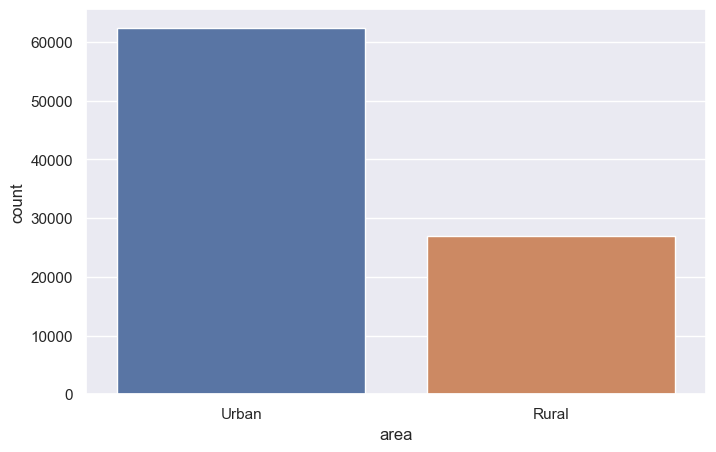

qualification count plot 



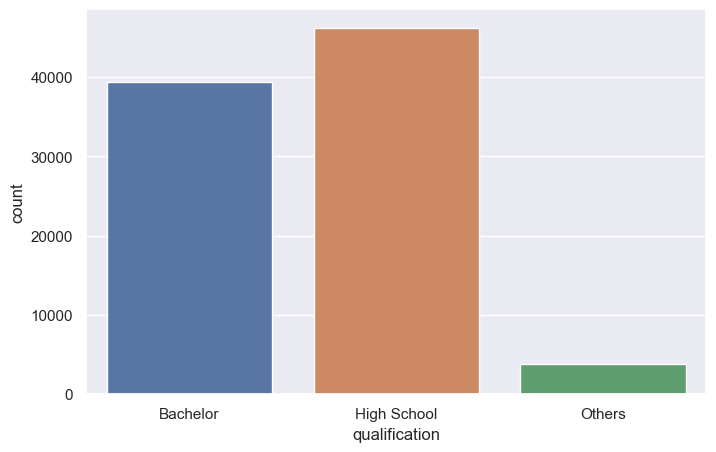

income count plot 



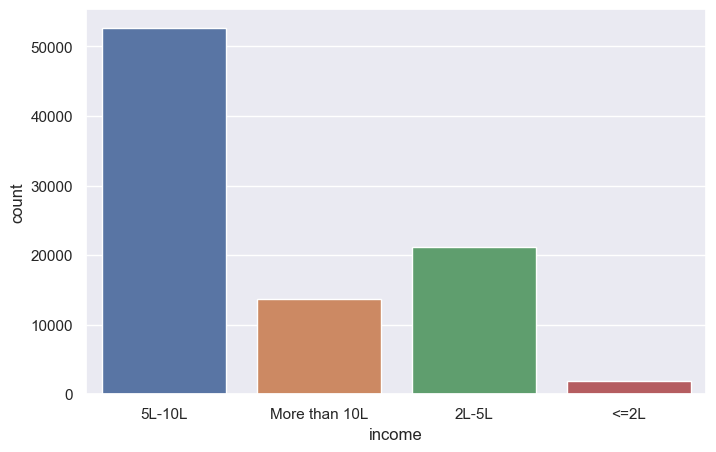

marital_status count plot 



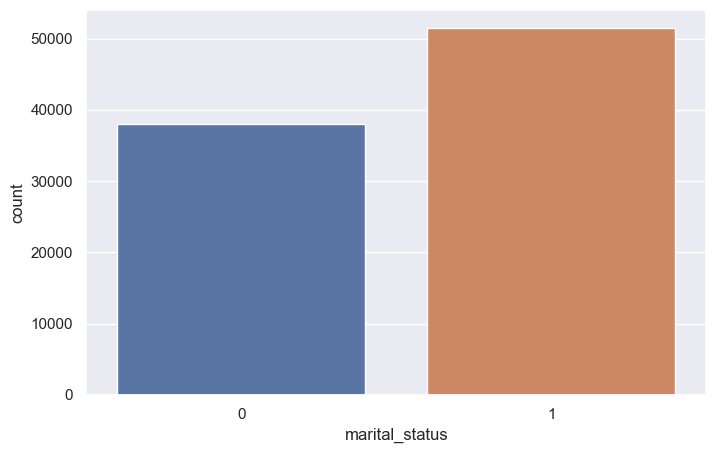

vintage count plot 



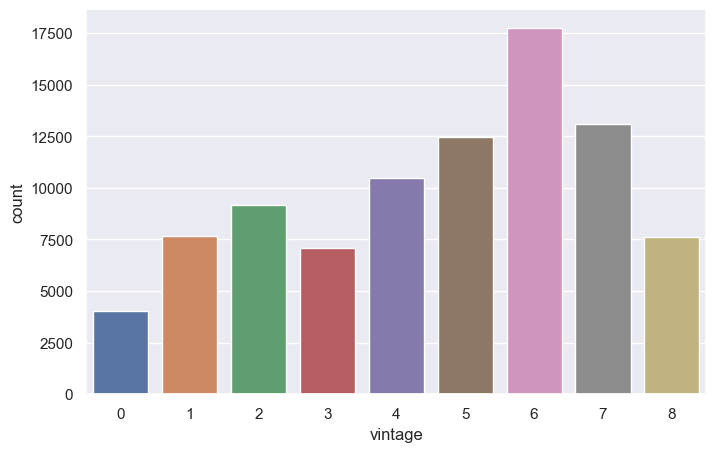

num_policies count plot 



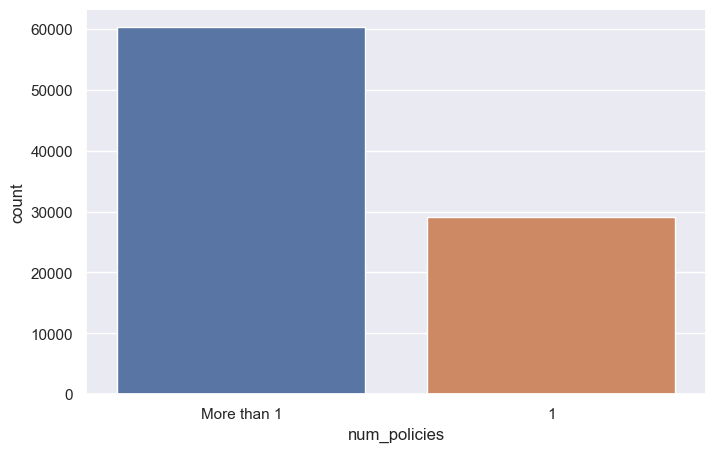

policy count plot 



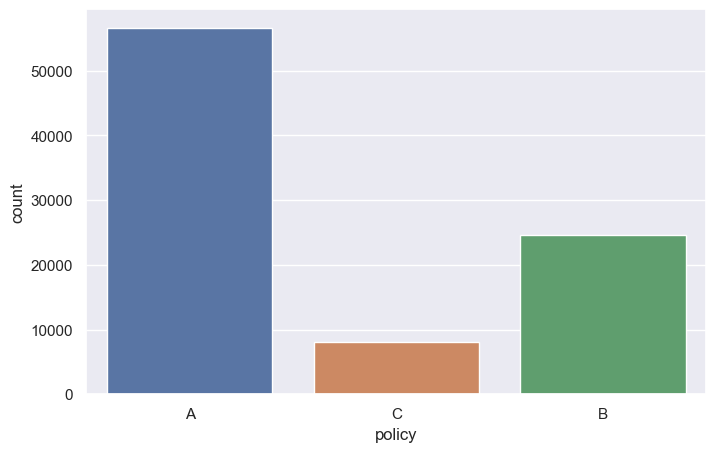

type_of_policy count plot 



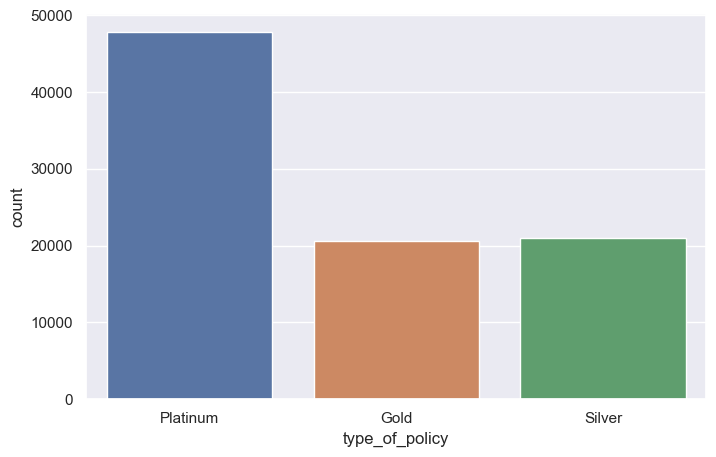

In [46]:
ll=['gender', 'area', 'qualification', 'income', 'marital_status', 'vintage', 'num_policies', 'policy', 'type_of_policy']

for col in ll:

       print(col +' count plot \n') 
       sns.countplot(x =col, data =train_df)
       #sns.title(col +' count plot')
       plt.show()   

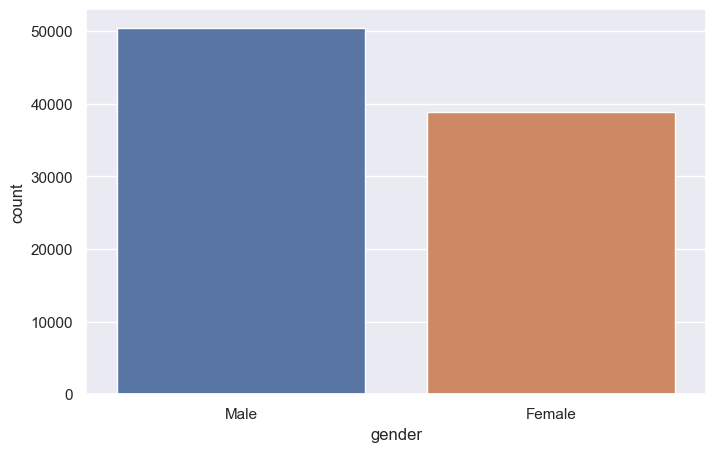

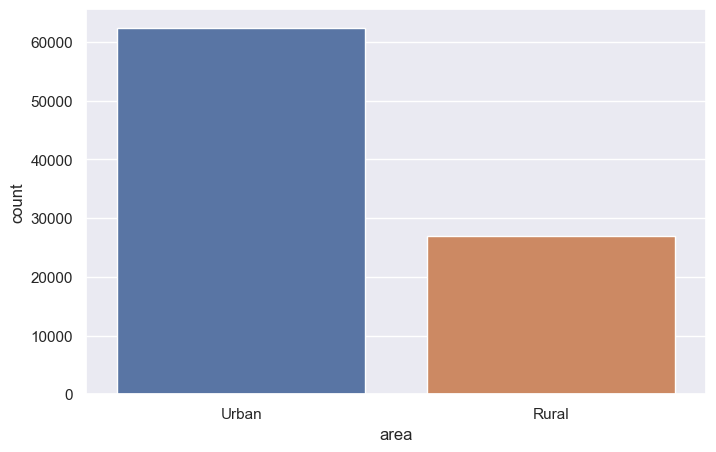

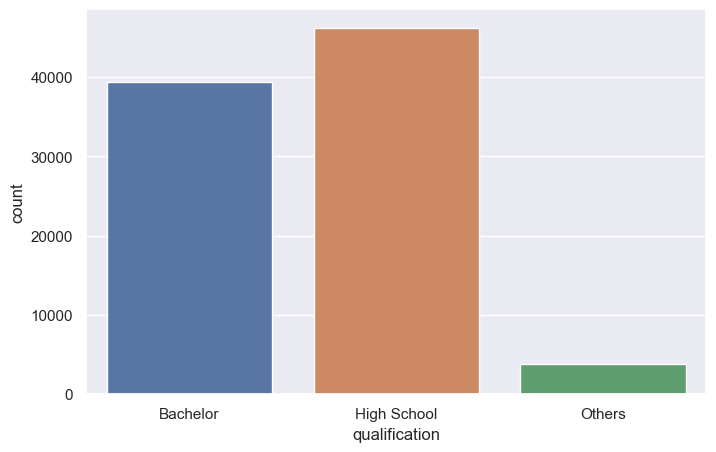

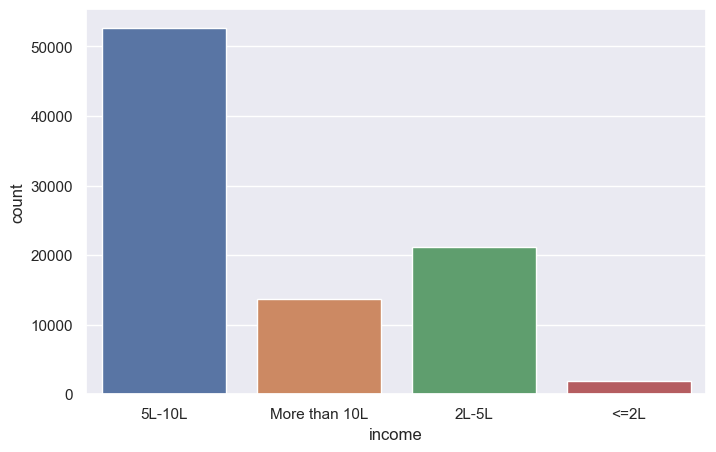

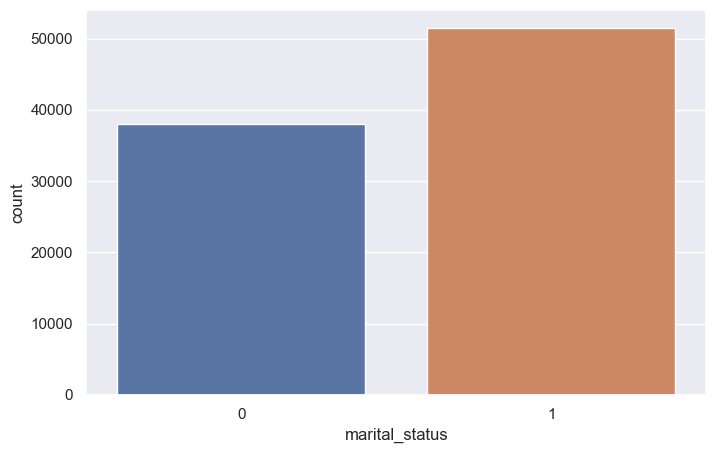

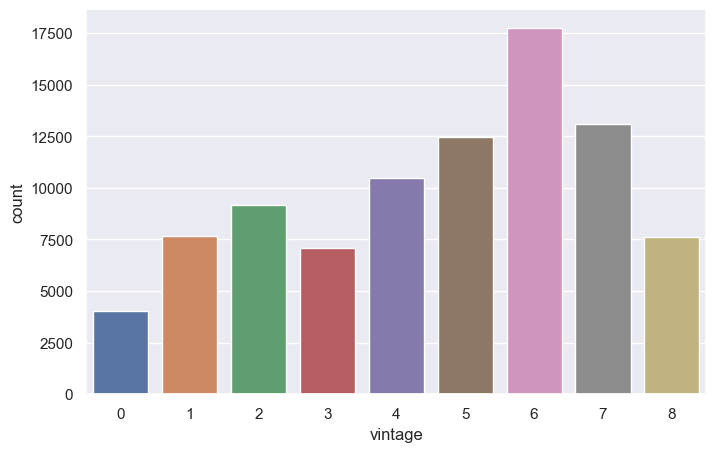

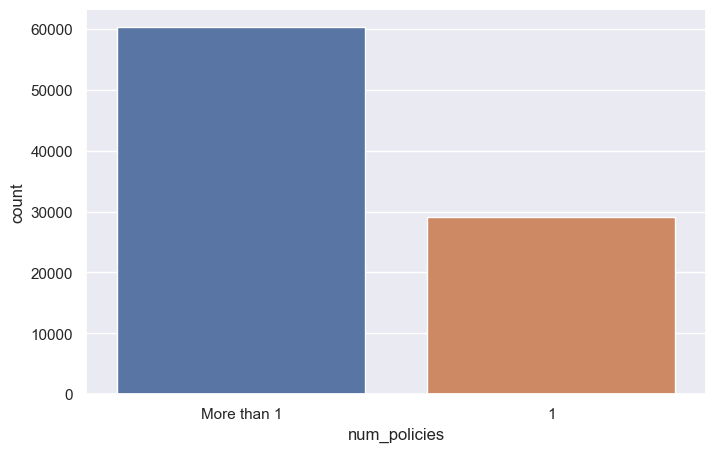

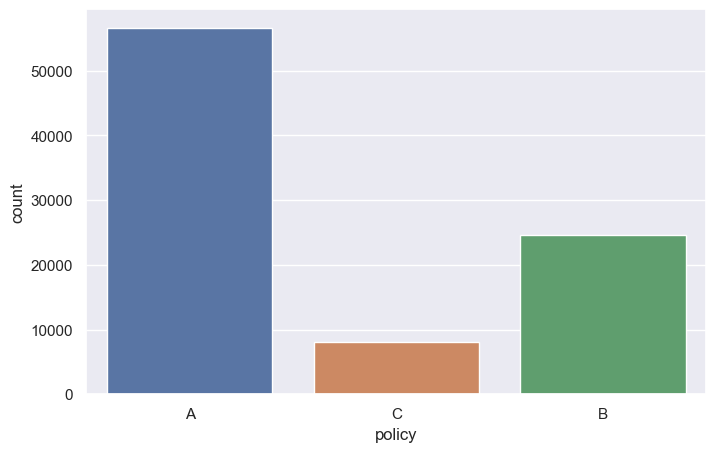

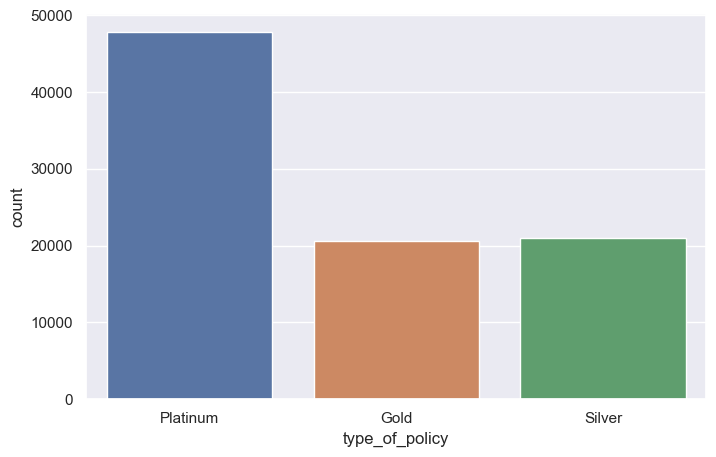

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ll=['gender', 'area', 'qualification', 'income', 'marital_status', 'vintage', 'num_policies', 'policy', 'type_of_policy']

# a for loop to automate our task--------------
for i, col in enumerate(ll):
    plt.figure(i)
    sns.countplot(x=col, data=train_df)

In [47]:
train_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


<AxesSubplot: xlabel='gender', ylabel='count'>

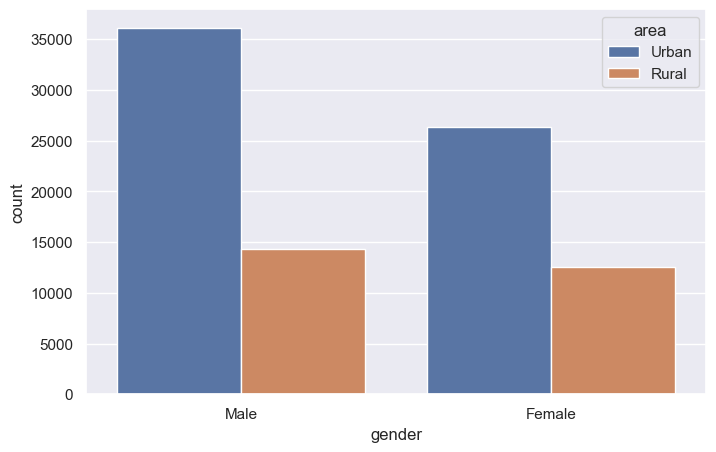

In [50]:
sns.countplot(x=train_df['gender'], hue=train_df['area'])


<AxesSubplot: xlabel='qualification', ylabel='count'>

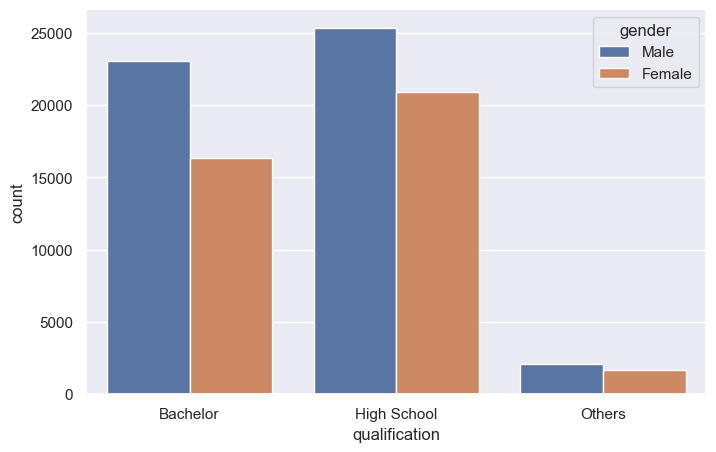

In [51]:
sns.countplot(x=train_df['qualification'], hue=train_df['gender'])


<AxesSubplot: xlabel='income', ylabel='count'>

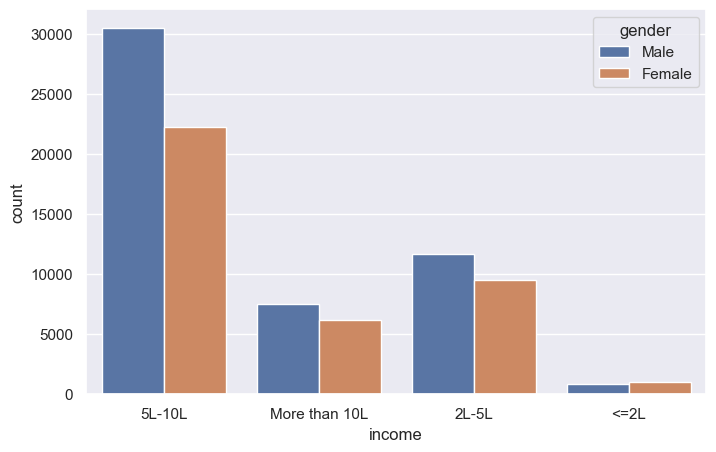

In [52]:
sns.countplot(x=train_df['income'], hue=train_df['gender'])


<AxesSubplot: xlabel='marital_status', ylabel='count'>

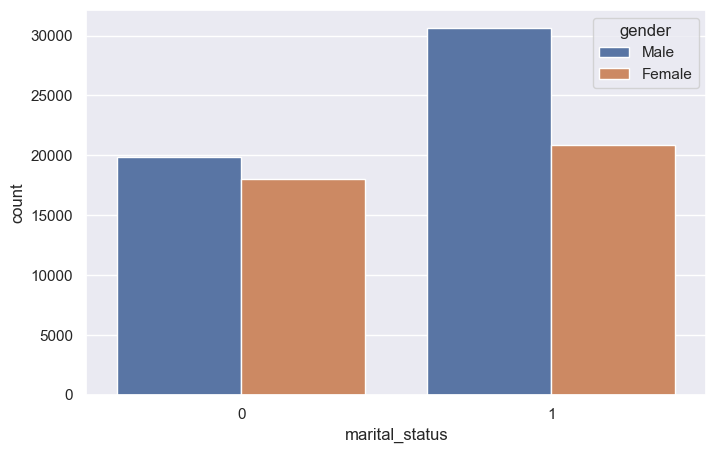

In [53]:
sns.countplot(x=train_df['marital_status'], hue=train_df['gender'])


<AxesSubplot: xlabel='policy', ylabel='count'>

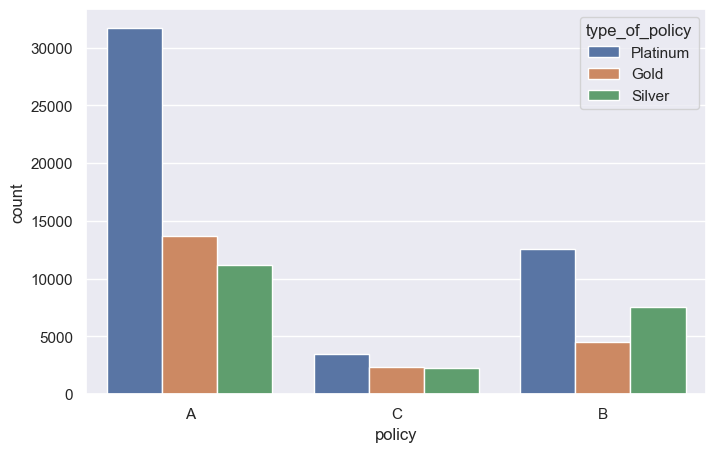

In [56]:
sns.countplot(x=train_df['policy'], hue=train_df['type_of_policy'])


In [55]:
table = pd.pivot_table(train_df, values='cltv', index=['gender', 'area'],
                    columns=['qualification'], aggfunc=np.mean)
print(table)

qualification       Bachelor    High School        Others
gender area                                              
Female Rural    84682.128755   81451.193912  69865.364431
       Urban   107981.548159  105380.177888  84476.118006
Male   Rural    78240.728086   77719.166719  64280.681178
       Urban   106098.882375  107433.287320  84601.361111


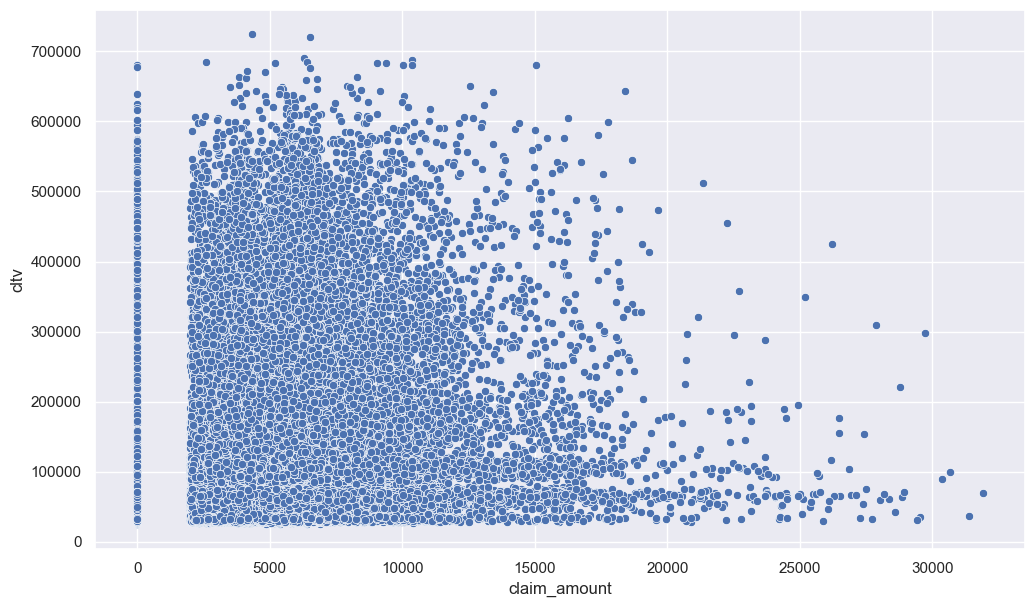

In [58]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='claim_amount', y='cltv', data=train_df)
plt.show()


In [63]:
#correlation
train_df.corr()

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003634,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000


In [64]:
train_df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [66]:
#statistics
train_df.describe(include='all')

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,89392.000000,89392,89392,89392,89392,89392.000000,89392.000000,89392.000000,89392,89392,89392,89392.000000
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,50497,62455,46247,52716,NaN,NaN,NaN,60263,56644,47796,NaN
mean,44696.500000,NaN,NaN,NaN,NaN,0.575488,4.595669,4351.502416,NaN,NaN,NaN,97952.828978
std,25805.391969,NaN,NaN,NaN,NaN,0.494272,2.290446,3262.359775,NaN,NaN,NaN,90613.814793
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,24828.000000
25%,22348.750000,NaN,NaN,NaN,NaN,0.000000,3.000000,2406.000000,NaN,NaN,NaN,52836.000000
50%,44696.500000,NaN,NaN,NaN,NaN,1.000000,5.000000,4089.000000,NaN,NaN,NaN,66396.000000
75%,67044.250000,NaN,NaN,NaN,NaN,1.000000,6.000000,6094.000000,NaN,NaN,NaN,103440.000000


In [80]:
train_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


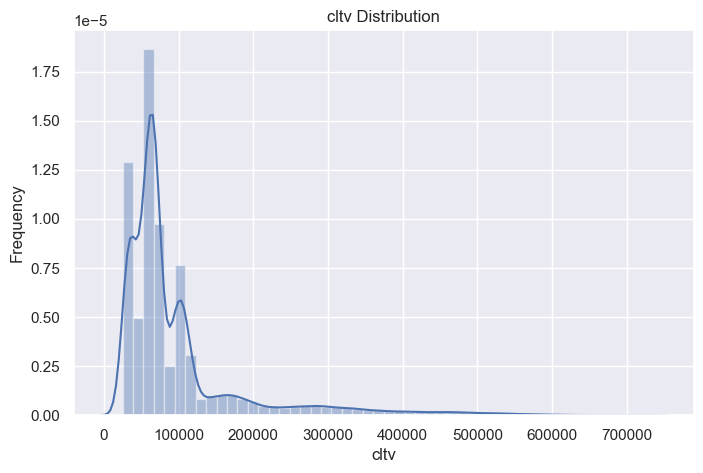

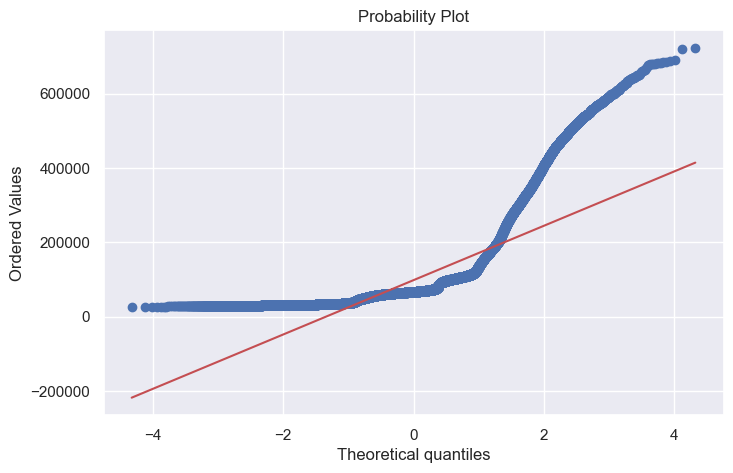

Skewness: 2.753
Kurtosis: 8.334


In [119]:
import scipy.stats as stats
sns.distplot(train_df['cltv'])
plt.title('cltv Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(train_df['cltv'], plot=plt)
plt.show()

# For normally distributed data, the skewness should be about zero. 
# A skenewss  value greater than zero means that there is more weight in the left tail of the distribution

print("Skewness: {:.3f}".format(train_df['cltv'].skew()))
print("Kurtosis: {:.3f}".format(train_df['cltv'].kurt()))

In [ ]:
#Method One

In [30]:
#Preprocesing: Dealing with outliers
q = train_df['cltv'].quantile(0.99)
data_no_outliers = train_df[train_df['cltv']<q]
data_no_outliers.describe(include='all')

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,88497.000000,88497,88497,88497,88497,88497.000000,88497.000000,88497.000000,88497,88497,88497,88497.000000
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,49960,61676,45800,52223,NaN,NaN,NaN,59384,56025,47296,NaN
mean,44715.564053,NaN,NaN,NaN,NaN,0.576811,4.594303,4332.643027,NaN,NaN,NaN,93461.994101
std,25808.935458,NaN,NaN,NaN,NaN,0.494068,2.290763,3254.520146,NaN,NaN,NaN,79115.681653
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,24828.000000
25%,22368.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,2391.000000,NaN,NaN,NaN,52488.000000
50%,44725.000000,NaN,NaN,NaN,NaN,1.000000,5.000000,4079.000000,NaN,NaN,NaN,66216.000000
75%,67076.000000,NaN,NaN,NaN,NaN,1.000000,6.000000,6081.000000,NaN,NaN,NaN,102528.000000


In [31]:
# convert to dummies
data_with_dummies = pd.get_dummies(data_no_outliers, drop_first=True)
data_with_dummies.columns.values

array(['id', 'marital_status', 'vintage', 'claim_amount', 'cltv',
       'gender_Male', 'area_Urban', 'qualification_High School',
       'qualification_Others', 'income_5L-10L', 'income_<=2L',
       'income_More than 10L', 'num_policies_More than 1', 'policy_B',
       'policy_C', 'type_of_policy_Platinum', 'type_of_policy_Silver'],
      dtype=object)

In [133]:
data_with_dummies.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,1,1,0,0,1,0,0,1,0,0,1,0
2,3,1,8,2599,64212,1,1,0,0,1,0,0,1,0,0,1,0
3,4,0,7,0,97920,0,0,1,0,1,0,0,1,0,0,1,0
4,5,1,6,3508,59736,1,1,1,0,0,0,1,1,0,0,0,0
5,6,1,1,0,348768,1,0,1,0,0,0,1,0,0,1,0,0


In [32]:
#drop id
data_preprocessed = data_with_dummies.drop('id', axis=1)
data_preprocessed.head()

,marital_status,vintage,claim_amount,cltv,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,1,5,5790,64308,1,1,0,0,1,0,0,1,0,0,1,0
2,1,8,2599,64212,1,1,0,0,1,0,0,1,0,0,1,0
3,0,7,0,97920,0,0,1,0,1,0,0,1,0,0,1,0
4,1,6,3508,59736,1,1,1,0,0,0,1,1,0,0,0,0
5,1,1,0,348768,1,0,1,0,0,0,1,0,0,1,0,0


In [49]:
#divide into X and Y
X = data_preprocessed.drop(['cltv'],axis=1)
Y = data_preprocessed['cltv']

In [50]:
#splitting
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=365)


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge

['scaledLR']: 0.163158 (0.003872)
['scaledLR', 'scaledSGD']: 0.161402 (0.004017)
['scaledLR', 'scaledSGD', 'scaledRF']: 0.049304 (0.011212)
['scaledLR', 'scaledSGD', 'scaledRF', 'scaledXGB']: 0.148202 (0.004697)
['scaledLR', 'scaledSGD', 'scaledRF', 'scaledXGB', 'scaledRidge']: 0.163158 (0.003872)
['scaledLR', 'scaledSGD', 'scaledRF', 'scaledXGB', 'scaledRidge', 'scaledLASSO']: 0.163158 (0.003872)
['scaledLR', 'scaledSGD', 'scaledRF', 'scaledXGB', 'scaledRidge', 'scaledLASSO', 'scaledELNET']: 0.148427 (0.003080)


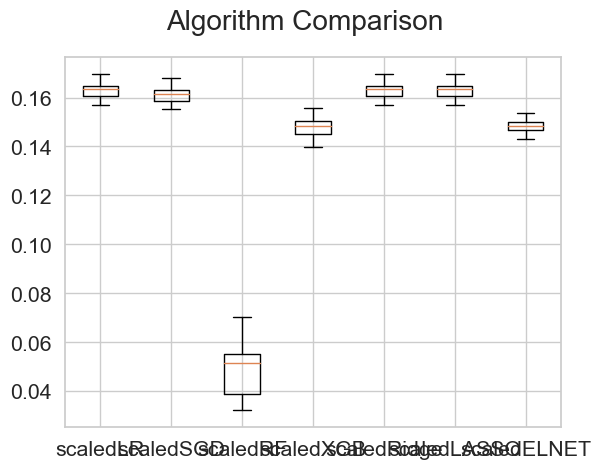

In [72]:
#check best models: LinearRegression, SGDRegressor, RandomForestRegressor, XGBRegressor, Ridge, Lasso, ElasticNet
pipelines = []
#RobustScaler()
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LinearRegression())]))))
pipelines.append(('scaledSGD' , (Pipeline([('scaled' , StandardScaler()),('SGD' ,SGDRegressor())]))))
pipelines.append(('scaledRF' , (Pipeline([('scaled' , StandardScaler()),('RF' ,RandomForestRegressor())]))))
pipelines.append(('scaledXGB' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,XGBRegressor())]))))
pipelines.append(('scaledRidge' , (Pipeline([('scaled' , StandardScaler()),('Ridge' ,Ridge(alpha=1.0))]))))
pipelines.append(('scaledLASSO' , (Pipeline([('scaled' , StandardScaler()),('LASSO' ,linear_model.Lasso(alpha=0.1))]))))
pipelines.append(('scaledELNET' , (Pipeline([('scaled' , StandardScaler()),('ELNET' ,linear_model.ElasticNet(random_state = 1))]))))


model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    crossv_results = cross_val_score(model , x_train ,y_train ,cv =kfold , scoring='r2')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

In [80]:
#SGD model in pipeline +kfold+gridsearchcv
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
pipeline = Pipeline([
    ("Scaling", StandardScaler()),
    ("model", SGDRegressor())
])
param_grid = {"model__alpha": np.arange(0, 1, 0.05),
              'model__penalty': ['l2', 'l1', 'elasticnet', None],
              "model__fit_intercept": [True, False],
              
             }
search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv =kfold, n_jobs=-1)

search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('Scaling', StandardScaler()),
                                       ('model', SGDRegressor())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'model__fit_intercept': [True, False],
                         'model__penalty': ['l2', 'l1', 'elasticnet', None]})

In [81]:
#metrics
y_pred = search.predict(x_test)
print('Mean Absolute Error: ', mean_absolute_error(y_pred, y_test))
print('Score', search.score(x_test, y_test))
print(r2_score(y_test, y_pred))

Mean Absolute Error:  44993.88215317457
Score 0.16212919350405086
0.16212919350405086


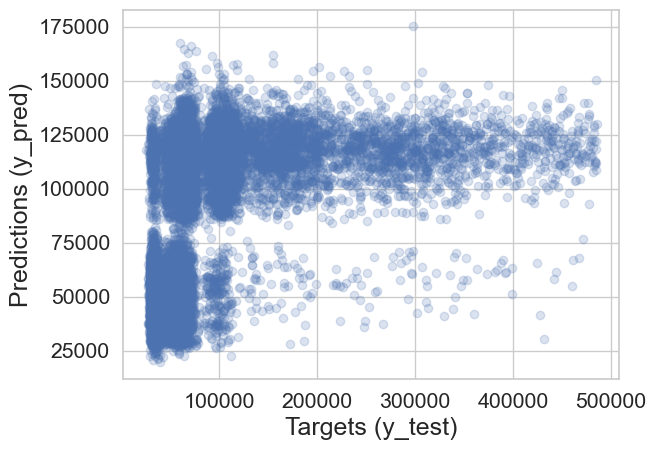

In [82]:
#y predicted vs y actual 
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_pred)',size=18)

plt.show()

In [83]:
#get dummies for test set
data_with_dummies_test = pd.get_dummies(test_df, drop_first=True)
data_with_dummies_test.columns.values

array(['id', 'marital_status', 'vintage', 'claim_amount', 'gender_Male',
       'area_Urban', 'qualification_High School', 'qualification_Others',
       'income_5L-10L', 'income_<=2L', 'income_More than 10L',
       'num_policies_More than 1', 'policy_B', 'policy_C',
       'type_of_policy_Platinum', 'type_of_policy_Silver'], dtype=object)

In [84]:
#sample submission file
sample_submission['id'] =data_with_dummies_test['id']
data_with_dummies_test=data_with_dummies_test.drop('id', axis=1)
final_pred=search.predict(data_with_dummies_test)
sample_submission['cltv'] =final_pred


In [85]:
sample_submission.head()

,id,cltv
0,89393,99387.742609
1,89394,122377.139498
2,89395,96369.570610
3,89396,84698.276835
4,89397,135374.647385


In [86]:
#final prediction
sample_submission.to_csv('submission_SGDFinal.csv', index=False)

In [35]:
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=42)), 
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=42))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude='object')),
    ('cat', categorical_transformer, selector(dtype_include='object'))
])


estimators = [
     #('ridge', KernelRidge()),
     ('lasso', Lasso(alpha=0.0008, random_state=42)),
     ('svr', SVR(C=3.0, epsilon= 0.008, gamma=0.0003)),
     ('xgb', XGBRegressor(learning_rate=0.009, max_depth=6,n_estimators=500,eta=0.01, max_bin=256, seed=42))
]


clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    #('rfecv', RFECV(RandomForestRegressor(random_state=42), step=1, cv=2)),
    ('model', StackingRegressor(estimators=estimators,final_estimator=XGBRegressor(n_estimators=500,random_state=42)))
])

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
#metrics
y_pred = clf.predict(x_test)
print('Mean Absolute Error: ', mean_absolute_error(y_pred, y_test))
print('Score', clf.score(x_test, y_test))
print(r2_score(y_test, y_pred))
#Mean Absolute Error:  46049.00883342161
#Score 0.10215229486700739
#0.10215229486700739